# Data Analysis of the “War of the Five Kings” - Game of Thrones

## Introduction

The War of the Five Kings is a famous civil war described in the well-known serious fantasy novel “Game of Thrones”. This is a civil strife with an unprecedented scale that involves seven kingdoms. As the name implies, a total of five persons claim to be the king during the war: Joffrey Baratheon, Stannis Baratheon and Renly Baratheon all claim to be the rightful heir of the iron throne. Moreover, Robb Stark is elected by the barons of the northern border to the King in the North, and Balon Greyjoy erects the flag of independence again and claims to be the King of the Iron Islands, in an attempt to shake off the ruling of the Iron Throne. 


This dataset (battles.csv) contains all the battles during the War of the Five Kings. It is part of the [Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones) in Kaggle. 

Variables in the dataset and meanings:


- **name:** String variable. The name of the battle.
- **year:** Numeric variable. The year of the battle.
- **battle_number:** Numeric variable. A unique ID number for the battle.
- **attacker_king:** Categorical. The attacker's king. A slash indicators that the king charges over the course of the war. For example, "Joffrey/Tommen Baratheon" is coded as such because one king follows the other in the Iron Throne.
- **defender_king:** Categorical variable. The defender's king.
- **attacker_1:** String variable. Major house attacking.
- **attacker_2:** String variable. Major house attacking.
- **attacker_3:** String variable. Major house attacking.
- **attacker_4:** String variable. Major house attacking.
- **defender_1:** String variable. Major house defending.
- **defender_2:** String variable. Major house defending.
- **defender_3:** String variable. Major house defending.
- **defender_4:** String variable. Major house defending.
- **attacker_outcome:** Categorical variable. The outcome from the perspective of the attacker. Categories: win, loss, draw.
- **battle_type:** Categorical variable. A classification of the battle's primary type. Categories:
    - pitched\_battle: Armies meet in a location and fight. This is also the baseline category.
    - ambush: A battle where stealth or subterfuge was the primary means of attack.
    - siege: A prolonged of a fortied position.
    - razing: An attack against an undefended position
- **major_death:** Binary variable. If there was a death of a major figure during the battle.
- **major_capture:** Binary variable. If there was the capture of the major figure during the battle.
- **attacker_size:** Numeric variable. The size of the attacker's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **defender_size:** Numeric variable. The size of the defenders's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **attacker_commander:** String variable. Major commanders of the attackers. Commander's names are included without honoric titles and commandders are seperated by commas.
- **defender_commander:** String variable. Major commanders of the defener. Commander's names are included without honoric titles and commandders are seperated by commas.
- **summer:** Binary variable. Was it summer?
- **location:** String variable. The location of the battle.
- **region:** Categorical variable. The region where the battle takes place. Categories: Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne
- **note:** String variable. Coding notes regarding individual observations.. 



## Questions：
1. Which year has the most battles?
2. Which region sees the largest number of battles?
3. Which king attacks most? Which king wins the most battles as an attacker?
4. Which battle type is more common?What battle styles are used by each attacker king.
5. The impact of army size.
6. The impact of season.
7. How many commanders are owned by each attacker king?
8. Which commander leads most battles as an attacker commander?Who are the commanders with the most victories of each attacker king?
9. Does the major house fight alone or with allies in attacker side?

## Data Wrangling

In [6]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline

In [2]:
# TO DO: load the dataset
battle = pd.read_csv('battles.csv')
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [22]:
# TO DO: check the dataset general info
battle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [23]:
# TO DO: clean the data (optional: only there are problems)
# check the missing values
battle.isnull().sum().sort_values(ascending=False)

defender_4            38
defender_3            38
attacker_4            36
defender_2            36
attacker_3            35
note                  33
attacker_2            28
defender_size         19
attacker_size         14
defender_commander    10
defender_king          3
attacker_king          2
location               1
summer                 1
defender_1             1
attacker_commander     1
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
region                 0
attacker_1             0
battle_number          0
year                   0
name                   0
dtype: int64

In [24]:
#check duplicated rows
battle.duplicated().sum()

0

In [25]:
#check info of numerical values
battle.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [3]:
battle.note.unique()

array([nan,
       "Greyjoy's troop number based on the Battle of Deepwood Motte, in which Asha had 1000 soldier on 30 longships. That comes out to ~33 per longship. In the Battle of the Stony Shore, Theon has 8 longships, and just we can estimate that he has 8*33 =265 troops.",
       "Greyjoy's troop number comes from the 264 estimate to have arrived on the stony shore minus the 20 Theon takes to attack Winterfell. Thus 264-20=244",
       'It isn\'t mentioned how many Stark men are left in Winterfell, other than "very few".',
       "Since House Bolton betrays the Starks for House Lannister, we code this battle as between these two houses. Greyjoy men, numbering only 20, don't play a major part in the fighting and end up dying anyway.",
       'This observation refers to the battle against the Stark men, not the attack on the wedding'], dtype=object)

## Exploratory data analysis

### 1. Which year has the most battles?
Year 299 has the most battles followed by year 300.

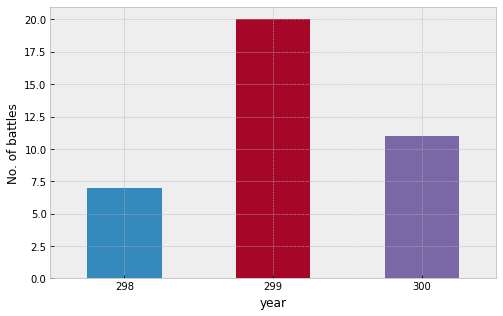

In [8]:
ax = battle.groupby(['year']).battle_number.count().plot(kind='bar',rot=0,figsize=(8,5))
ax.set(ylabel='No. of battles');

### 2.Which region sees the largest number of battles?
The Riverlands gets the highest number followed by the North.

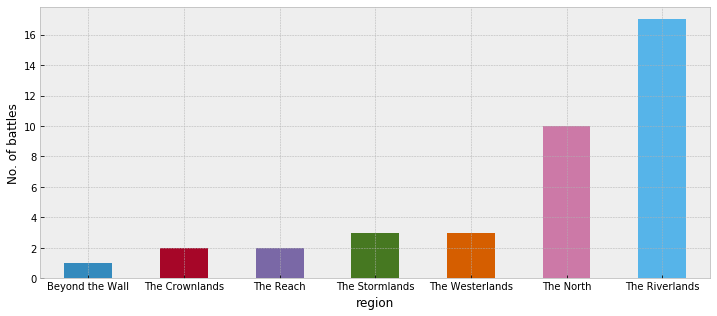

In [7]:
ax = battle.groupby(['region']).battle_number.count().sort_values().plot(kind='bar',figsize=(12,5),rot=0);
ax.set(ylabel='No. of battles');

### Combining both year and region, show the statistics of number of battles
In year 298, battles happen at the Reverlands and the Westerlands. While in year 299 and 300, battles spread over whole area. The Riverlands sees the most battles over these three years. But at year 300, the number of battles reduces more than half of previous year. The North joins the battle since year 299. There are no records beyond the wall and at the Reach in year 299. In year 300, the Crownlands and the Westerlands are peaceful.

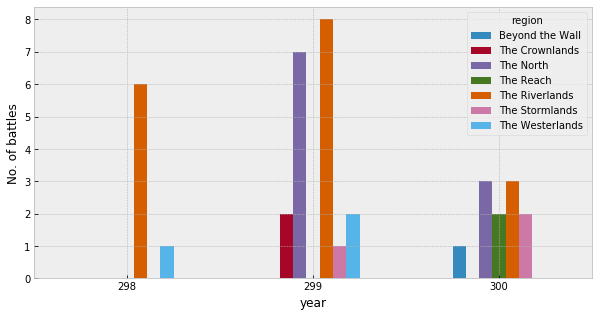

In [9]:
ax = battle.groupby(['year']).region.value_counts().unstack().plot.bar(figsize=(10,5),rot=0);
ax.set(ylabel='No. of battles');

### 3. Which king attacks most? Which king wins the most battles as an attacker?
Joffrey/Tommen makes the most attacks followed by Robb stark. Balon/Euron attacks 7 times and wins all the battles. Stannis has the worst luck and loses more than half of the battles.

In [14]:
attack_king = pd.DataFrame()
attack_king['Total'] = battle.groupby(['attacker_king']).battle_number.count()
attack_king['Victory'] = battle[battle.attacker_outcome=='win'].groupby(['attacker_king']).battle_number.count()
attack_king['ratio'] = (attack_king['Victory']/attack_king['Total']).round(decimals=2)

,Total,Victory,ratio
attacker_king,,,
Balon/Euron Greyjoy,7,7,1.00
Joffrey/Tommen Baratheon,14,13,0.93
Robb Stark,10,8,0.80
Stannis Baratheon,5,2,0.40


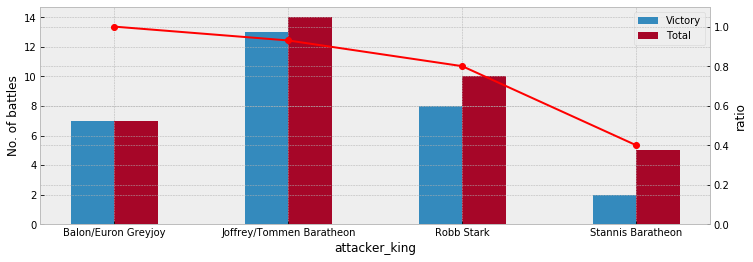

In [27]:
ax1 = attack_king[['Victory','Total']].plot.bar(figsize=(12,4),rot=0)
ax2 = ax1.twinx()
ax2 = attack_king["ratio"].plot(style='ro-')

ax2.set_ylim(0,1.1)
ax2.set_xlabel('Attacker Kings')
ax1.set(ylabel='No. of battles')
ax2.set_ylabel("ratio");

### 4.1. Which battle type is more common?
Pitched battle is the most common one while razing is very rare. Siege and ambush are also popular.

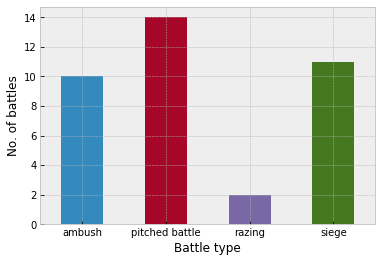

In [28]:
ax = battle.groupby(['battle_type']).battle_number.count().plot.bar(rot=0)
ax.set(xlabel='Battle type')
ax.set(ylabel='No. of battles');

### 4.2 What are the battle styles used by each attacker king.
Most kings don't use razing except Balon/Euron. Stannis doesn't use ambush. Pitched battle and siege are employed by all the attacker kings.

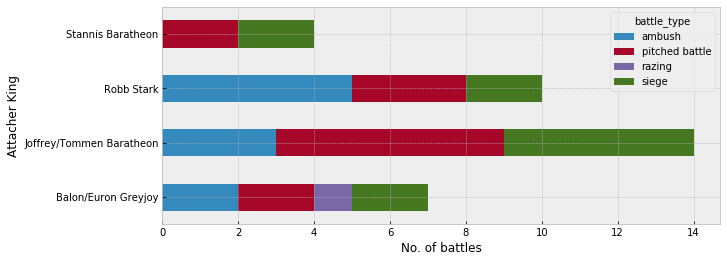

In [52]:
king_type = battle.groupby('attacker_king').battle_type.value_counts().unstack()
ax = king_type.plot.barh(stacked = True,figsize=(10,4))
ax.set(ylabel='Attacher King',xlabel='No. of battles');

### 5. The impact of army size. 
Refered to [this](https://www.kaggle.com/shaildeliwala/exploratory-analysis-and-predictions) kernal. But I didn't follow his code.

From the following plots, we can find that the bigger army size does not necessarily guarantee victory. There are more cases of a larger army be defeated by a smaller one. Especially in the Battle of Castle Black, the attacker is defeated although the attacking force is overwhelming. However, due to missing values, there are only 14 available samples. It could be biased to conclude that smaller armies get a higher chance to win.

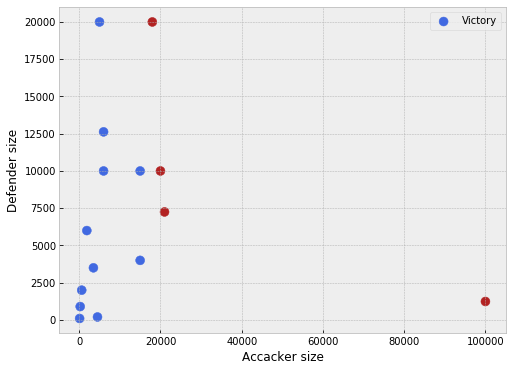

In [29]:
data = battle[['name',"attacker_size", "defender_size", "attacker_outcome"]].copy(deep=True)
data.dropna(inplace=True)
colors = ['royalblue' if x == 'win' else 'firebrick' for x in data.attacker_outcome.values]
axes = data.plot.scatter(x="attacker_size",y="defender_size",c = colors, s = 80, figsize=(8,6));
axes.set(xlabel='Accacker size', ylabel='Defender size')
axes.legend(['Victory']);

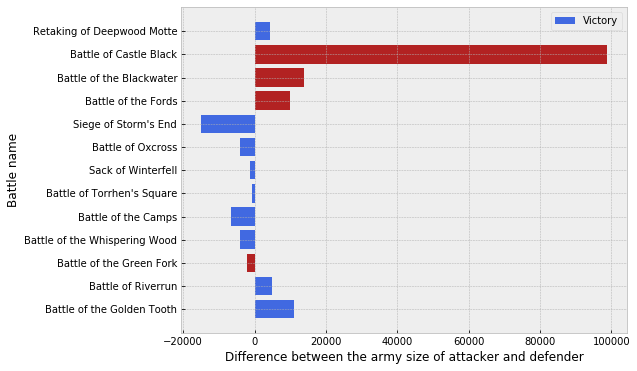

In [30]:
data['diff'] = data.attacker_size-data.defender_size
data = data[data['diff']!=0]

colors = ['royalblue' if x == "win" else 'firebrick' if x == "loss" else "white" for x in data.attacker_outcome.values]
x = data['diff'].values
y = np.arange(len(x))

fig,ax=plt.subplots(figsize=(8,6))
ax.barh(y,x,color=colors)
ax.set_yticks(y)
ax.set_yticklabels(data.name.values);
ax.legend(['Victory']);
ax.set(ylabel='Battle name',xlabel='Difference between the army size of attacker and defender');

### 6. Impact of summer.

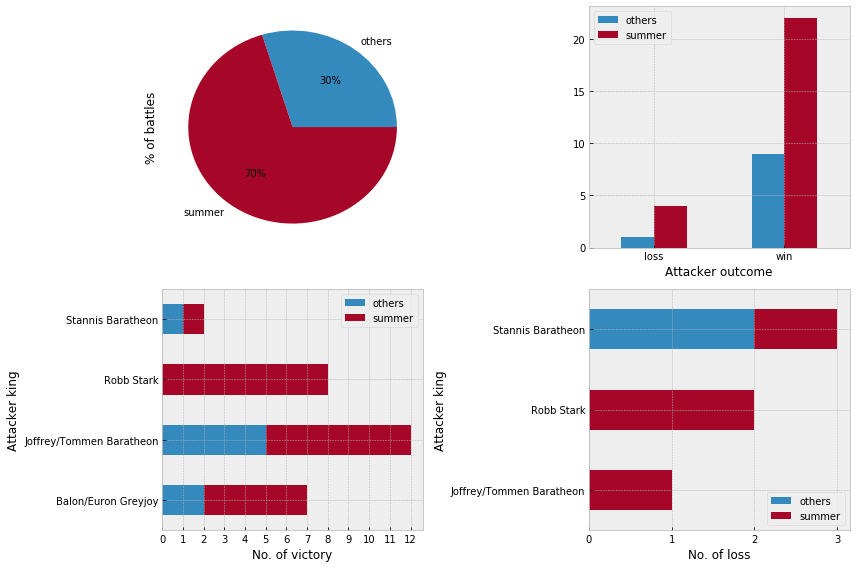

In [31]:
king_season_win = battle[battle['attacker_outcome']=='win'].groupby('attacker_king').summer.value_counts().unstack()
king_season_loss = battle[battle['attacker_outcome']!='win'].groupby('attacker_king').summer.value_counts().unstack()
fig,axes = plt.subplots(2,2,figsize=(12,8))
battle.groupby('summer').battle_number.count().plot.pie(ax=axes[0,0],labels=['others','summer'],autopct='%.0f%%')
axes[0,0].set_ylabel('% of battles')

battle.groupby('attacker_outcome').summer.value_counts().unstack().plot.bar(ax=axes[0,1],rot=0)
axes[0,1].legend(['others','summer'])
axes[0,1].set(xlabel='Attacker outcome')

king_season_win.plot.barh(stacked=True,ax=axes[1,0])
axes[1,0].legend(['others','summer'])
axes[1,0].set(ylabel='Attacker king',xlabel='No. of victory')
axes[1,0].set_xticks(range(13))
king_season_loss.plot.barh(stacked=True,ax=axes[1,1])
axes[1,1].legend(['others','summer'])
axes[1,1].set(ylabel='Attacker king', xlabel='No. of loss')
axes[1,1].set_xticks(range(4))

plt.tight_layout()

### 7. How many commanders are owned by each attacker king?
Refered to [this](https://www.kaggle.com/shaildeliwala/exploratory-analysis-and-predictions) kernal. 

Joffrey/Tommen, Robb Stark and Stannis have the same median value of 2 commanders while Balon/Euron has one. For Joffrey/Tommen and Robb Stark, they have the same maximum 3 commanders under the upper fence. There are two special battles where Joffrey/Tommen has 6 commanders and Robb Stark gets 5. The number of commanders of Stannis varies over battles. The minimum and maximum numbers are 1 and 6, respectively.

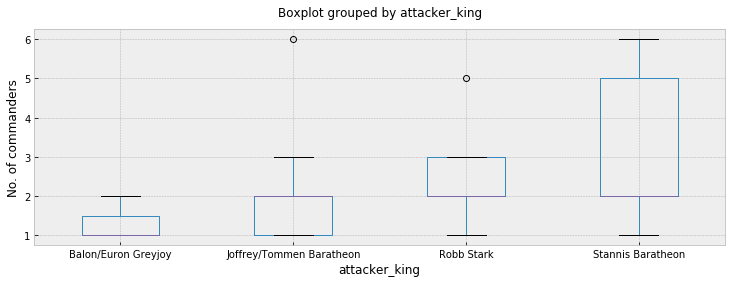

In [72]:
battle['attack_commander_number'] = [len(x) if type(x) == list else np.nan for x in battle.attacker_commander.str.split(",")]
ax = battle.boxplot(column='attack_commander_number', by='attacker_king',figsize=(12,4));
ax.set(title=' ',ylabel='No. of commanders');

### 8. Which commander leads most battles as an attacker commander?Who are the commanders with the most victories of each attacker king?
Gregor Clegane commands 5 battles followed by Robb Stark, Jaime Lannister and Stannis Baratheon. Robb Stark and Stannis Baratheon are both king and commander. Jaime Lannister,Robb Stark and Gregor Clegane are on the top of attacker commders, who win four battles. Followed by Victarion Grejoy and Brynden Tully. They make three victories. Stannis Baratheon himself outperforms his commanders and has two victories.

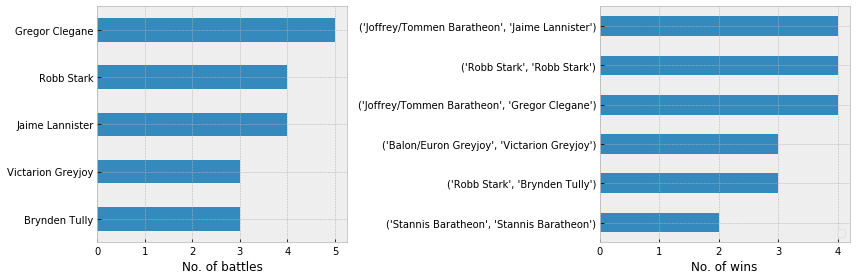

In [48]:
data = battle[['attacker_commander','attacker_king','attacker_outcome']].copy(deep=True)
data.dropna(inplace=True)
att_com = pd.DataFrame(data['attacker_commander'].str.split(', ',expand=True).stack().reset_index(level=1,drop=True), columns=['com'])
att_com_king = data[['attacker_king','attacker_outcome']].merge(att_com,how='right',left_index=True,right_index=True)
king_com =att_com_king[att_com_king.attacker_outcome=='win'].reset_index(drop=True)
king_com = king_com.groupby(['attacker_king','com']).attacker_outcome.count().reset_index()
king_com = king_com.sort_values(by=['attacker_outcome']).tail(6)

fig,axes = plt.subplots(1,2,figsize=(12,4))
att_com_king['com'].value_counts().sort_values().tail(5).plot.barh(ax=axes[0])
axes[0].set_xlabel('No. of battles')

king_com.plot.barh(ax=axes[1])
axes[1].set(yticklabels=list(zip(king_com.attacker_king.values,king_com.com.values)))
axes[1].legend('')
axes[1].set_xticks(range(5));
axes[1].set_xlabel('No. of wins')

plt.tight_layout()

### 9. Does the major house attack alone or with allies?

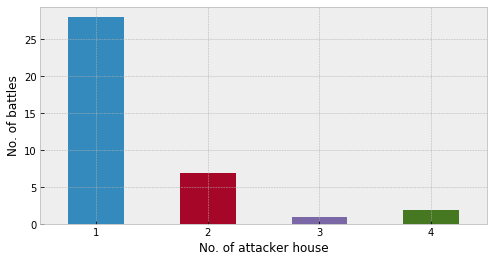

In [11]:
data=battle[['attacker_1','attacker_2','attacker_3','attacker_4']].copy(deep=True).fillna(0)
data['ally_num'] = data.astype(bool).sum(axis=1)
ax = data.groupby('ally_num').count().attacker_1.plot.bar(rot=0,figsize=(8,4))
ax.set(xlabel='No. of attacker house',ylabel='No. of battles');

### When performing exploratory data analysis, please make sure you record your key steps and reasoning processes during the data analysis. You can insert code cells and markdown cells to organize your report. 


## Conclusions

1. **Which year has the most battles?**<br/>
   Year 299 has the most battles followed by year 300.
   <br/>
   <br/>
2. **Which region sees the largest number of battles?**<br/>
   In year 298, battles happen at the Reverlands and the Westerlands. While in year 299 and 300, battles spread over whole area. The Riverlands sees the most battles over these three years. But at year 300, the number of battles reduces more than half of previous year. The North joins the battle since year 299. There are no records beyond the wall and at the Reach in year 299. In year 300, the Crownlands and the Westerlands are peaceful.
    <br/>
    <br/>
3. **Which king attacks most? Which king wins the most battles as attacker?**<br/>
   Joffrey/Tommen makes the most attacks followed by Robb stark. Balon/Euron attacks 7 times and wins all the battles. Stannis has the worst luck and loses more than half of the battles.
    <br/>
    <br/>
4. **Which battle type is more common?What are the battle styles used by each attacker king?**<br/>
   Most kings don't use razing except Balon/Euron. Stannis doesn't use ambush. Pitched battle and siege are employed by all the attacker kings.
    <br/>
    <br/>
5. **The impact of army size.**<br/>
   From the plots, we can find that the bigger army size does not necessarily guarantee victory. There are more cases of a larger army be defeated by a smaller one. Especially in the Battle of Castle Black, the attacker is defeated although the attacking force is overwhelming. However, due to missing values, there are only 14 available samples. It could be biased to conclude that smaller armies get a higher chance to win.
    <br/>
    <br/>
6. **The impact of season.**<br/>
   Although 70% battles happen in summer, we cannot say summer is a determine feature. From the comparison between the win and loss, we can find that summer does not show big impact to the battle results. 
    <br/>
    <br/>
7. **How many commanders are owned by each attacker king?Who are the commanders with the most victories of each attacker king?**<br/>
   Joffrey/Tommen, Robb Stark and Stannis have the same median value of 2 commanders while Balon/Euron has one. For Joffrey/Tommen and Robb Stark, they have the same maximum 3 commanders under the upper fence. There are rare case where Joffrey/Tommen has 6 commanders and Robb Stark gets 5, repectively.  The number of commanders of Stannis varies over battles. The minimum and maximum numbers are 1 and 6, respectively. Considering Stannis losses more but wins less, too many commanders could be a potential reason for his loss.
    <br/>
    <br/>
8. **Which commander leads most battles as an attacker commander?**<br/>
  Gregor Clegane commands 5 battles followed by Robb Stark, Jaime Lannister and Stannis Baratheon. Robb Stark and Stannis Baratheon are both king and commander. Jaime Lannister,Robb Stark and Gregor Clegane are on the top of attacker commders, who win four battles. Followed by Victarion Grejoy and Brynden Tully. They make three victories. Stannis Baratheon himself outperforms his commanders and has two victories.
    <br/>
    <br/>
9. **The major house fights alone or with allies as attacker?**<br/>
   They prefer fighting alone. There are only few cases of more than 2 houses.